## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  39.588507  1350.369923  0.362697  9.710430  1.340404
1  74.987494   308.419841  0.277968  3.308340  1.039782
2   7.511300   546.197817  0.680238  7.717086  1.489350
3  26.358855  1060.680643  0.551944  8.785878  1.458030
4  79.652661  1052.266986  0.260990  6.196990  1.306233


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0594551	total: 57.7ms	remaining: 57.7s
1:	learn: 1.0479404	total: 58.4ms	remaining: 29.2s
2:	learn: 1.0397741	total: 58.9ms	remaining: 19.6s
3:	learn: 1.0276930	total: 59.2ms	remaining: 14.8s
4:	learn: 1.0149853	total: 59.8ms	remaining: 11.9s
5:	learn: 1.0034355	total: 60.1ms	remaining: 9.96s
6:	learn: 0.9908503	total: 60.5ms	remaining: 8.58s
7:	learn: 0.9766722	total: 61ms	remaining: 7.56s
8:	learn: 0.9655293	total: 61.4ms	remaining: 6.76s
9:	learn: 0.9515669	total: 61.6ms	remaining: 6.1s
10:	learn: 0.9413621	total: 62.7ms	remaining: 5.64s
11:	learn: 0.9313232	total: 63.2ms	remaining: 5.2s
12:	learn: 0.9219865	total: 63.6ms	remaining: 4.83s
13:	learn: 0.9140132	total: 64.1ms	remaining: 4.51s
14:	learn: 0.9003906	total: 64.5ms	remaining: 4.23s
15:	learn: 0.8889850	total: 65ms	remaining: 4s
16:	learn: 0.8812406	total: 65.5ms	remaining: 3.79s
17:	learn: 0.8726365	total: 65.9ms	remaining: 3.59s
18:	learn: 0.8627669	total: 66.3ms	remaining: 3.42s
1

104:	learn: 0.3844934	total: 104ms	remaining: 885ms
105:	learn: 0.3811919	total: 104ms	remaining: 879ms
106:	learn: 0.3778698	total: 105ms	remaining: 874ms
107:	learn: 0.3746999	total: 105ms	remaining: 868ms
108:	learn: 0.3718279	total: 106ms	remaining: 863ms
109:	learn: 0.3684166	total: 106ms	remaining: 858ms
110:	learn: 0.3655369	total: 107ms	remaining: 854ms
111:	learn: 0.3625542	total: 107ms	remaining: 849ms
112:	learn: 0.3597784	total: 108ms	remaining: 844ms
113:	learn: 0.3575079	total: 108ms	remaining: 840ms
114:	learn: 0.3548157	total: 108ms	remaining: 834ms
115:	learn: 0.3522803	total: 109ms	remaining: 829ms
116:	learn: 0.3496604	total: 109ms	remaining: 825ms
117:	learn: 0.3468204	total: 110ms	remaining: 820ms
118:	learn: 0.3441578	total: 110ms	remaining: 816ms
119:	learn: 0.3416260	total: 111ms	remaining: 811ms
120:	learn: 0.3391296	total: 111ms	remaining: 807ms
121:	learn: 0.3363705	total: 112ms	remaining: 803ms
122:	learn: 0.3338735	total: 112ms	remaining: 798ms
123:	learn: 

286:	learn: 0.1586262	total: 186ms	remaining: 463ms
287:	learn: 0.1581653	total: 187ms	remaining: 462ms
288:	learn: 0.1576567	total: 187ms	remaining: 460ms
289:	learn: 0.1568064	total: 187ms	remaining: 459ms
290:	learn: 0.1565328	total: 188ms	remaining: 458ms
291:	learn: 0.1562274	total: 188ms	remaining: 457ms
292:	learn: 0.1559626	total: 189ms	remaining: 455ms
293:	learn: 0.1551229	total: 189ms	remaining: 454ms
294:	learn: 0.1549125	total: 190ms	remaining: 453ms
295:	learn: 0.1546234	total: 190ms	remaining: 452ms
296:	learn: 0.1542042	total: 190ms	remaining: 450ms
297:	learn: 0.1536866	total: 191ms	remaining: 449ms
298:	learn: 0.1527785	total: 191ms	remaining: 448ms
299:	learn: 0.1525966	total: 192ms	remaining: 447ms
300:	learn: 0.1523105	total: 192ms	remaining: 446ms
301:	learn: 0.1513732	total: 192ms	remaining: 444ms
302:	learn: 0.1506373	total: 193ms	remaining: 443ms
303:	learn: 0.1498482	total: 193ms	remaining: 442ms
304:	learn: 0.1491135	total: 194ms	remaining: 441ms
305:	learn: 

506:	learn: 0.0963588	total: 286ms	remaining: 278ms
507:	learn: 0.0960794	total: 287ms	remaining: 278ms
508:	learn: 0.0960044	total: 287ms	remaining: 277ms
509:	learn: 0.0955798	total: 288ms	remaining: 277ms
510:	learn: 0.0953058	total: 288ms	remaining: 276ms
511:	learn: 0.0951874	total: 289ms	remaining: 275ms
512:	learn: 0.0949725	total: 289ms	remaining: 275ms
513:	learn: 0.0947058	total: 290ms	remaining: 274ms
514:	learn: 0.0945588	total: 290ms	remaining: 273ms
515:	learn: 0.0943763	total: 291ms	remaining: 273ms
516:	learn: 0.0941657	total: 291ms	remaining: 272ms
517:	learn: 0.0939870	total: 292ms	remaining: 271ms
518:	learn: 0.0937800	total: 292ms	remaining: 271ms
519:	learn: 0.0935761	total: 293ms	remaining: 270ms
520:	learn: 0.0934016	total: 293ms	remaining: 269ms
521:	learn: 0.0932012	total: 293ms	remaining: 269ms
522:	learn: 0.0930576	total: 294ms	remaining: 268ms
523:	learn: 0.0928083	total: 294ms	remaining: 267ms
524:	learn: 0.0926681	total: 295ms	remaining: 267ms
525:	learn: 

687:	learn: 0.0678140	total: 369ms	remaining: 167ms
688:	learn: 0.0677465	total: 370ms	remaining: 167ms
689:	learn: 0.0676800	total: 370ms	remaining: 166ms
690:	learn: 0.0674610	total: 370ms	remaining: 166ms
691:	learn: 0.0673948	total: 371ms	remaining: 165ms
692:	learn: 0.0672601	total: 371ms	remaining: 164ms
693:	learn: 0.0672439	total: 372ms	remaining: 164ms
694:	learn: 0.0670220	total: 372ms	remaining: 163ms
695:	learn: 0.0669535	total: 373ms	remaining: 163ms
696:	learn: 0.0668862	total: 373ms	remaining: 162ms
697:	learn: 0.0668309	total: 374ms	remaining: 162ms
698:	learn: 0.0666286	total: 374ms	remaining: 161ms
699:	learn: 0.0665624	total: 375ms	remaining: 161ms
700:	learn: 0.0663636	total: 375ms	remaining: 160ms
701:	learn: 0.0663088	total: 375ms	remaining: 159ms
702:	learn: 0.0661131	total: 376ms	remaining: 159ms
703:	learn: 0.0660482	total: 376ms	remaining: 158ms
704:	learn: 0.0658558	total: 377ms	remaining: 158ms
705:	learn: 0.0657921	total: 377ms	remaining: 157ms
706:	learn: 

902:	learn: 0.0442134	total: 469ms	remaining: 50.3ms
903:	learn: 0.0441798	total: 469ms	remaining: 49.8ms
904:	learn: 0.0440719	total: 470ms	remaining: 49.3ms
905:	learn: 0.0440366	total: 470ms	remaining: 48.7ms
906:	learn: 0.0440018	total: 470ms	remaining: 48.2ms
907:	learn: 0.0438006	total: 471ms	remaining: 47.7ms
908:	learn: 0.0437126	total: 471ms	remaining: 47.1ms
909:	learn: 0.0435925	total: 471ms	remaining: 46.6ms
910:	learn: 0.0434868	total: 472ms	remaining: 46.1ms
911:	learn: 0.0433000	total: 472ms	remaining: 45.6ms
912:	learn: 0.0432374	total: 473ms	remaining: 45ms
913:	learn: 0.0431948	total: 473ms	remaining: 44.5ms
914:	learn: 0.0431335	total: 473ms	remaining: 44ms
915:	learn: 0.0430915	total: 474ms	remaining: 43.4ms
916:	learn: 0.0430586	total: 474ms	remaining: 42.9ms
917:	learn: 0.0429988	total: 474ms	remaining: 42.4ms
918:	learn: 0.0429732	total: 475ms	remaining: 41.8ms
919:	learn: 0.0428157	total: 475ms	remaining: 41.3ms
920:	learn: 0.0426339	total: 476ms	remaining: 40.8

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

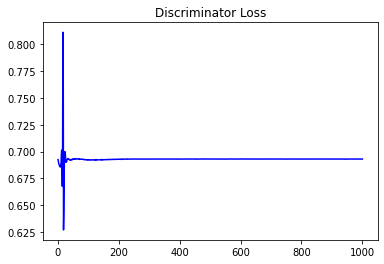

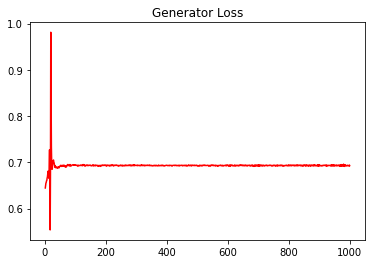

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.22722754780489737


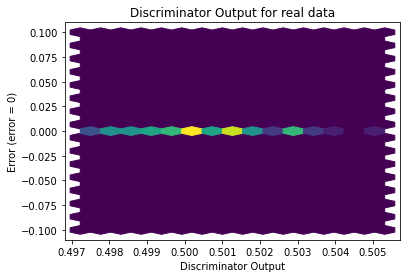

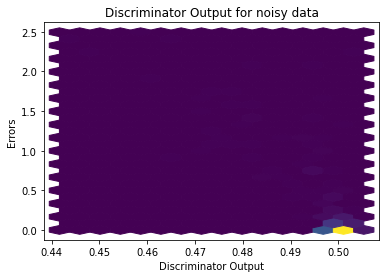

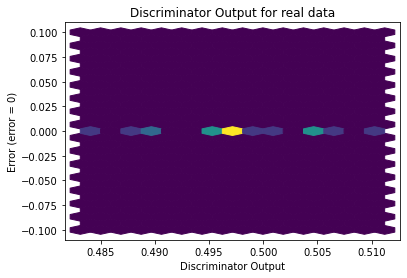

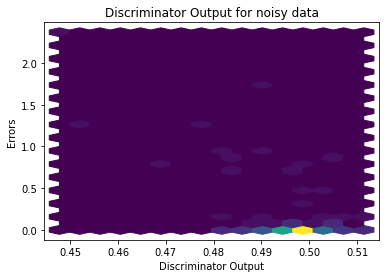

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


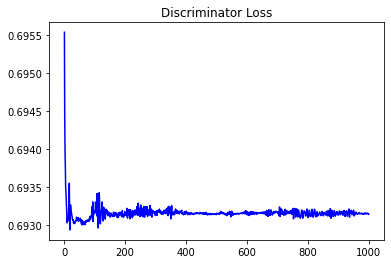

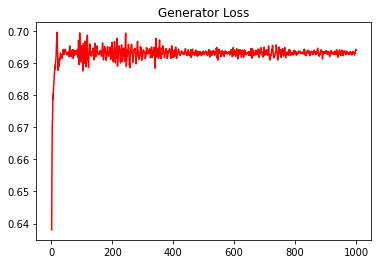

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.19780907788648677


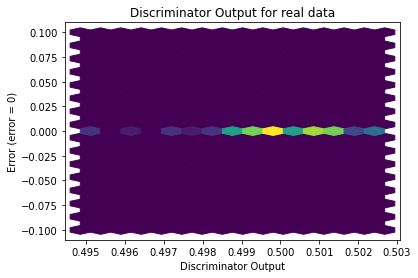

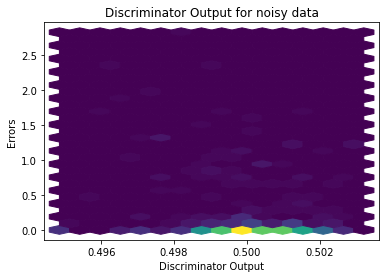

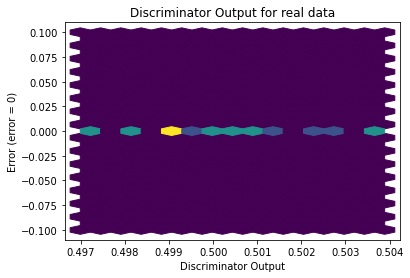

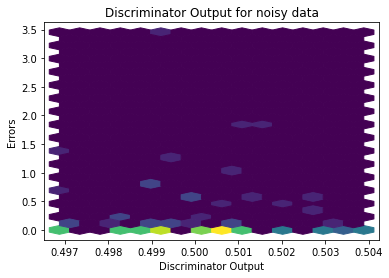

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0691]], requires_grad=True)
